<a href="https://colab.research.google.com/github/diaboloshogunate/GoogleColabML/blob/main/CIFAR-10-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# imports
import itertools
from keras.datasets import cifar10
from keras.models import Sequential
import keras.layers as layers
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import pandas as pd

Train: X=(50000, 32, 32, 3), y=(50000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


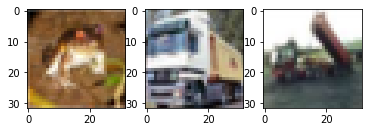

In [4]:
# load data
(trainX, trainY), (testX, testY) = cifar10.load_data()
trainY = to_categorical(trainY)
testY = to_categorical(testY)
trainNormX = trainX.astype('float32')
testNormX = testX.astype('float32')
trainNormX = trainNormX / 255.0
testNormX = testNormX / 255.0
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
for i in range(3):
	pyplot.subplot(131 + i)
	pyplot.imshow(trainX[i])
pyplot.show()

In [5]:
# define parameters
learningRates = [0.01]
activationMethods = ["tanh"]
lossFunctions = ["categorical_crossentropy"]
epochs = [40]
experiments = list(itertools.product(learningRates, activationMethods, lossFunctions, epochs))
experiments

[(0.01, 'tanh', 'categorical_crossentropy', 40)]

Experiment 1
Learning Rate: 0.01, Activation: tanh, Loss: categorical_crossentropy, Epochs: 40

Epoch 1/40
250/250 [==============================] - 11s 16ms/step - loss: 2.0117 - accuracy: 0.2814 - val_loss: 1.8769 - val_accuracy: 0.3279
Epoch 2/40
250/250 [==============================] - 4s 14ms/step - loss: 1.8027 - accuracy: 0.3672 - val_loss: 1.7355 - val_accuracy: 0.3923
Epoch 3/40
250/250 [==============================] - 4s 14ms/step - loss: 1.7072 - accuracy: 0.4020 - val_loss: 1.6826 - val_accuracy: 0.4086
Epoch 4/40
250/250 [==============================] - 4s 14ms/step - loss: 1.6306 - accuracy: 0.4322 - val_loss: 1.5942 - val_accuracy: 0.4428
Epoch 5/40
250/250 [==============================] - 4s 15ms/step - loss: 1.5604 - accuracy: 0.4564 - val_loss: 1.5572 - val_accuracy: 0.4503
Epoch 6/40
250/250 [==============================] - 4s 14ms/step - loss: 1.5090 - accuracy: 0.4753 - val_loss: 1.4977 - val_accuracy: 0.4721
Epoch 7/40
250/250 [=========================

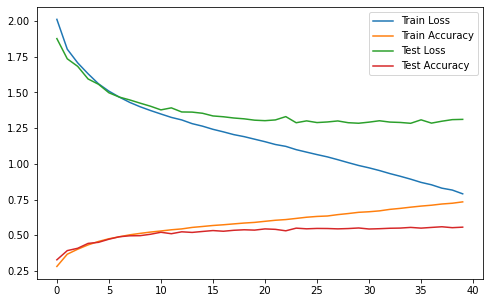

In [6]:
# experiment models
selectedModel = None
selectedModelLoss = None
for experiment, parameters in enumerate(experiments):
  learningRate, activation, loss, epochs = parameters

  # display info
  print(f"Experiment {experiment+1}")
  print(f"Learning Rate: {learningRate}, Activation: {activation}, Loss: {loss}, Epochs: {epochs}")
  print()
  
  # build model
  opt = SGD(learning_rate=learningRate, momentum=0)
  model = keras.Sequential()

  model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation=activation, padding="same", input_shape=(32,32,3)))
  model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(1,1)))

  model.add(layers.Conv2D(filters=12, kernel_size=(3, 3), activation=activation, padding="same", input_shape=(32,32,3)))
  model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(1,1)))

  model.add(layers.Conv2D(filters=18, kernel_size=(3, 3), activation=activation, padding="same", input_shape=(32,32,3)))
  model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(1,1)))

  model.add(layers.Conv2D(filters=24, kernel_size=(3, 3), activation=activation, padding="same", input_shape=(32,32,3)))
  model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(1,1)))

  model.add(layers.Conv2D(filters=30, kernel_size=(3, 3), activation=activation, padding="same", input_shape=(32,32,3)))
  model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(1,1)))

  model.add(layers.Flatten())
  model.add(layers.Dense(units=120, activation=activation))
  model.add(layers.Dense(units=84, activation=activation))
  model.add(layers.Dense(units=10, activation = 'softmax'))
  model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
  history = model.fit(x=trainNormX, y=trainY, epochs=epochs, batch_size=200, validation_data=(testNormX, testY), verbose=1);
  lossValue = history.history["loss"][-1]

  if(selectedModel == None or selectedModelLoss > lossValue): 
    selectedModel = model
    selectedModelLoss = lossValue
  
  # plot accuracy
  pd.DataFrame(history.history).plot(figsize=(8,5))
  pyplot.legend(["Train Loss", "Train Accuracy", "Test Loss", "Test Accuracy"])
  pyplot.show()